Importing libraries

In [70]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.6f' % x)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import skew

<h2>Extracting data from a local file</h2>

In [71]:
kaggle_train = pd.read_csv('Downloads/train(1).csv') 
kaggle_test = pd.read_csv('Downloads/test(1).csv')
testID = kaggle_test['Id']
#merging the two dataframes in one
df = pd.concat([kaggle_train, kaggle_test])

In [72]:
kaggle_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NA

In [73]:
kaggle_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [74]:

df.drop(['Id'], axis=1, inplace=True)

<h2>Exploring data</h2>

In [75]:
df.head(1460)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000000,Unf,0.000000,150.000000,856.000000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000000,0.000000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2.000000,548.000000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000000,Unf,0.000000,284.000000,1262.000000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000000,1.000000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2.000000,460.000000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000000,Unf,0.000000,434.000000,920.000000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000000,0.000000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2.000000,608.000000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000000,Unf,0.000000,540.000000,756.000000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000000,0.000000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3.000000,642.000000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000000,Unf,0.000000,490.000000,1145.000000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000000,0.000000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3.000000,836.000000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.000000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.000000,953.000000,953.000000,GasA,Ex,Y,SBrkr,953,694,0,1647,0.000000,0.000000,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000000,RFn,2.000000,460.000000,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.000000
1456,20,RL,85.000000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000000,TA,TA,CBlock,Gd,TA,No,ALQ,790.000000,Rec,163.000000,589.000000,1542.000000,GasA,TA,Y,SBrkr,2073,0,0,2073,1.000000,0.000000,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000000,Unf,2.000000,500.000000,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.000000
1457,

In [76]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Numeric features

In [77]:
numeric_features= kaggle_train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Categorical features

In [78]:
categoricals = kaggle_train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Histogram Plot for SalePrice

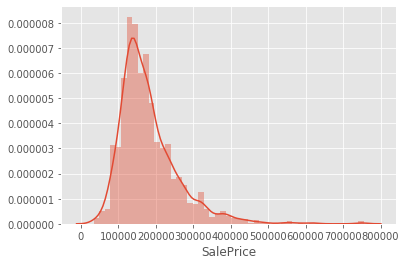

In [79]:
sns.distplot(kaggle_train['SalePrice'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [81]:
kaggle_train.shape

(1460, 81)

In [82]:
kaggle_test.shape

(1459, 80)

Transforming the ordinal features

In [83]:
grades = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
literal = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num = [9, 7, 5, 3, 2]
G = dict(zip(literal, num))


In [84]:
df[grades] = df[grades].replace(G)

finding the number of missing values

In [85]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

<h2>Data Cleaning</h2>

In [86]:
#delete rows with all null values
df =df.dropna(how='all', axis=0)

In [87]:
#Finding percentages of missing values in each col as it helps to decide better:P
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


In [88]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [89]:
df[df['BsmtFullBath'].isnull()]
#looks lik there is no such feature in such houses at all. so fill with 0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,20,RM,99.000000,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.000000,5,5,PConc,nan,nan,NaN,NaN,nan,NaN,nan,nan,nan,GasA,5,Y,FuseA,896,0,0,896,nan,nan,1,0,2,1,5.000000,4,Typ,0,nan,Detchd,1946.000000,Unf,1.000000,280.000000,5.000000,5.000000,Y,0,0,0,0,0,0,nan,MnPrv,NaN,0,4,2008,ConLD,Abnorml,nan
728,20,RL,123.000000,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.000000,5,5,Slab,nan,nan,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,GasA,5,Y,SBrkr,3820,0,0,3820,nan,nan,3,1,5,1,9.000000,11,Typ,2,7.000000,Attchd,1959.000000,Unf,2.000000,624.000000,5.000000,5.000000,Y,0,372,0,0,0,0,nan,NaN,NaN,0,7,2008,WD,Normal,nan


In [90]:
df.BsmtFullBath.fillna(0, inplace = True)
df['BsmtHalfBath'].fillna(0, inplace = True)
df['BsmtFinSF1'].fillna(0, inplace= True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['TotalBsmtSF'].fillna(0, inplace  =True)

In [91]:
print(df.GarageCars.dtype)
df[df['GarageCars'].isnull()]
#there are no cars and no garage area data
#most probably it is not available

float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1116,70,RM,50.000000,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.000000,5,5,BrkTil,7.000000,5.000000,No,ALQ,548.000000,Unf,0.000000,311.000000,859.000000,GasA,9,Y,SBrkr,942,886,0,1828,0.000000,0.000000,2,0,3,1,7.000000,6,Typ,0,nan,Detchd,nan,NaN,nan,nan,nan,nan,Y,174,0,212,0,0,0,nan,MnPrv,NaN,0,3,2007,WD,Alloca,nan


In [92]:
#filling those null values with 0
df['GarageCars'].fillna(0, inplace  =True)
df['GarageArea'].fillna(0, inplace  =True)

In [93]:
print(df.Exterior1st.dtype)
df[df['Exterior1st'].isnull()]
# df[df['Exterior1st']=='0']

object


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,30,RL,85.000000,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.000000,5,5,PConc,5.000000,5.000000,Gd,ALQ,1035.000000,Unf,0.000000,545.000000,1580.000000,GasA,9,Y,SBrkr,1518,0,0,1518,1.000000,0.000000,1,0,2,1,3.000000,5,Typ,2,7.000000,NaN,nan,NaN,0.000000,0.000000,nan,nan,Y,0,39,0,0,0,0,nan,NaN,NaN,0,1,2008,WD,Normal,nan


If the percentage is high there is no point in filling them

In [94]:
#deleting those columns
# df = df.drop((missing_data[missing_data[missing_data['Total']!=1459]>1]).index,1)#as the unknown saleprices are present in the test file

df = df.drop((missing_data[(missing_data['Total']!=1459) & (missing_data['Total']>4)]).index,1)

# df = df.drop(df_train.loc[df['Electrical'].isnull()].index)

df.isnull().sum().max()

1459

In [95]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,706.000000,0.000000,150.000000,856.000000,GasA,9,Y,SBrkr,856,854,0,1710,1.000000,0.000000,2,1,3,1,7.000000,8,Typ,0,2.000000,548.000000,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.000000
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,5,5,CBlock,978.000000,0.000000,284.000000,1262.000000,GasA,9,Y,SBrkr,1262,0,0,1262,0.000000,1.000000,2,0,3,1,5.000000,6,Typ,1,2.000000,460.000000,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.000000
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,486.000000,0.000000,434.000000,920.000000,GasA,9,Y,SBrkr,920,866,0,1786,1.000000,0.000000,2,1,3,1,7.000000,6,Typ,1,2.000000,608.000000,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.000000
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,5,5,BrkTil,216.000000,0.000000,540.000000,756.000000,GasA,7,Y,SBrkr,961,756,0,1717,1.000000,0.000000,1,0,3,1,7.000000,7,Typ,1,3.000000,642.000000,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,655.000000,0.000000,490.000000,1145.000000,GasA,9,Y,SBrkr,1145,1053,0,2198,1.000000,0.000000,2,1,4,1,7.000000,9,Typ,1,3.000000,836.000000,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.000000


We can replace few missing values<br>
As kitchenQual is almost equal to OverallQual

In [96]:
df['KitchenQual'].fillna(df['OverallQual'], inplace=True)
# df['LotFrontage'] = df['LotFrontage'].fillna(data.loc['train', 'LotFrontage'].median())

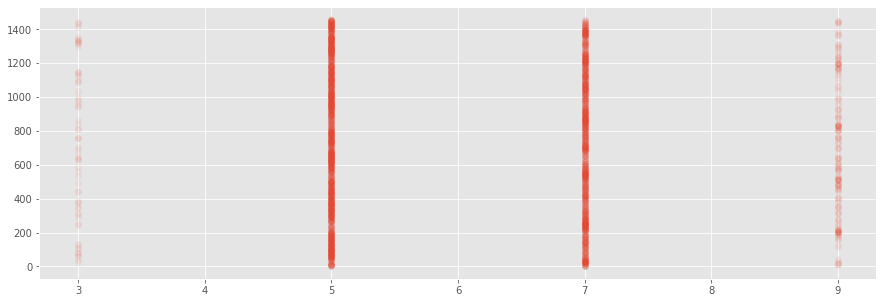

In [97]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,5))
plt.scatter( df['KitchenQual'],df['KitchenQual'].index, alpha=0.060)
plt.show()

In [98]:
df['HouseStyle'].describe()

count       2919
unique         8
top       1Story
freq        1471
Name: HouseStyle, dtype: object

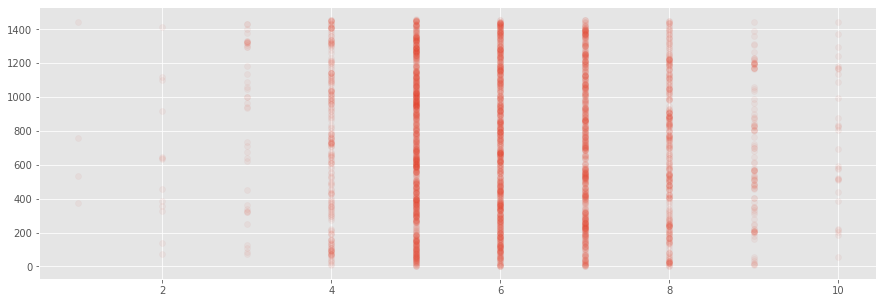

In [99]:
plt.subplots(figsize=(15,5))
plt.scatter( df['OverallQual'],df['OverallQual'].index, alpha=0.060)
plt.show()

In [100]:
df['BsmtHalfBath'].dtype

dtype('float64')

In [101]:
df['SaleType'].describe()

count     2918
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [102]:
df['SaleType'].mode().iloc[0]

'WD'

In [103]:
#fill the NaN values with mode as they are really less
col_list = ['Functional','SaleType', 'Electrical','Exterior1st','Exterior2nd','Utilities','MSZoning']
for col in col_list:
    df[col].fillna(df[col].mode().iloc[0], inplace =True)


In [104]:
df.YrSold.dtype

dtype('int64')

In [105]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,706.000000,0.000000,150.000000,856.000000,GasA,9,Y,SBrkr,856,854,0,1710,1.000000,0.000000,2,1,3,1,7.000000,8,Typ,0,2.000000,548.000000,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.000000
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,5,5,CBlock,978.000000,0.000000,284.000000,1262.000000,GasA,9,Y,SBrkr,1262,0,0,1262,0.000000,1.000000,2,0,3,1,5.000000,6,Typ,1,2.000000,460.000000,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.000000
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,486.000000,0.000000,434.000000,920.000000,GasA,9,Y,SBrkr,920,866,0,1786,1.000000,0.000000,2,1,3,1,7.000000,6,Typ,1,2.000000,608.000000,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.000000
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,5,5,BrkTil,216.000000,0.000000,540.000000,756.000000,GasA,7,Y,SBrkr,961,756,0,1717,1.000000,0.000000,1,0,3,1,7.000000,7,Typ,1,3.000000,642.000000,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,655.000000,0.000000,490.000000,1145.000000,GasA,9,Y,SBrkr,1145,1053,0,2198,1.000000,0.000000,2,1,4,1,7.000000,9,Typ,1,3.000000,836.000000,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.000000


converting some columns to appropriate data type

In [106]:
df['MSSubClass'] = df['MSSubClass'].astype('object', copy=False)
df['MoSold'] = df['MoSold'].astype('object', copy=False)
df['BsmtFullBath'] = df['BsmtFullBath'].astype('int64', copy=False)
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('int64', copy=False)
df['GarageCars'] = df['GarageCars'].astype('int64', copy=False)
df['YrSold'] = df['YrSold'].astype('int64', copy=False)
df['YearBuilt'] = df['YearBuilt'].astype('int64', copy=False)


In [107]:
numeric_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.000000,8450,7,5,2003,2003,196.000000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.000000,9600,6,8,1976,1976,0.000000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.000000,11250,7,5,2001,2002,162.000000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.000000,9550,7,5,1915,1970,0.000000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.000000,14260,8,5,2000,2000,350.000000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000000,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.000000,7917,6,5,1999,2000,0.000000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.000000,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.000000,13175,6,6,1978,1988,119.000000,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.000000,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.000000,9042,7,9,1941,2006,0.000000,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.000000,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.000000,9717,5,6,1950,1996,0.000000,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.000000,1,240,366,0,112,0,0,0,0,4,2010,142125


In [108]:
# df_test_final = pd.get_dummies(df_test, drop_first = True)
# df_train_final = pd.get_dummies(df_train, drop_first = True)


<h3>Removing Outliers</h3>

In [109]:
print(df.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                       min           max          mean
BsmtHalfBath      0.000000      2.000000      0.061322
HalfBath          0.000000      2.000000      0.380267
KitchenAbvGr      0.000000      3.000000      1.044536
BsmtFullBath      0.000000      3.000000      0.429599
FullBath          0.000000      4.000000      1.568003
Fireplaces        0.000000      4.000000      0.597122
GarageCars        0.000000      5.000000      1.766016
BedroomAbvGr      0.000000      8.000000      2.860226
ExterQual         3.000000      9.000000      5.793422
ExterCond         2.000000      9.000000      5.172319
OverallCond       1.000000      9.000000      5.564577
HeatingQC         2.000000      9.000000      7.304556
KitchenQual       3.000000      9.000000      6.021583
OverallQual       1.000000     10.000000      6.089072
TotRmsAbvGrd      2.000000     15.000000      6.451524
3SsnPorch         0.000000    508.000000      2.602261
ScreenPorch       0.000000    576.000000     16.062350
OpenPorchS

In [110]:
df1 = pd.get_dummies(df, drop_first = True)

In [111]:
df_train=df1[0:1460]
df_test=df1[1460:2919]
# test_final=df_final[df_final['SalePrice'].isnull()]
# train_final=df_final[df_final['SalePrice'].isnull()==False]

In [112]:
# rscvsjknvljs

In [113]:
df_train.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000

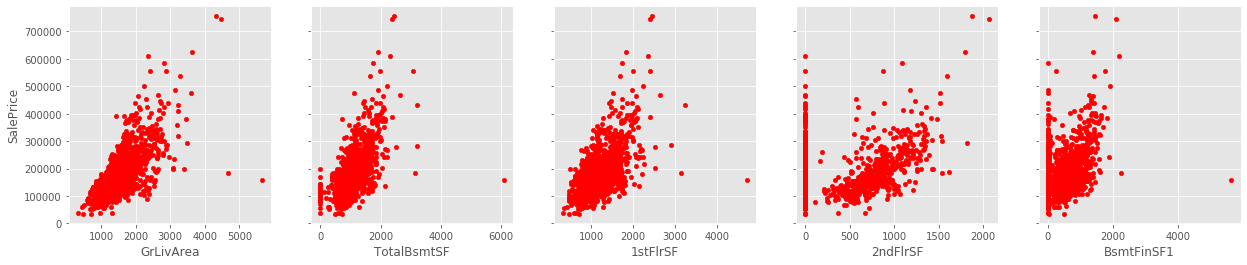

In [114]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(21, 4))
axes = np.ravel(axes)
col_name1 = ['GrLivArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1']
col_name2 = ['BsmtFinSF2','BsmtUnfSF','LotArea','MiscVal']
col_name3= ['3SsnPorch','ScreenPorch','EnclosedPorch','LowQualFinSF','WoodDeckSF' ]
for i, c in zip(range(5), col_name1):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

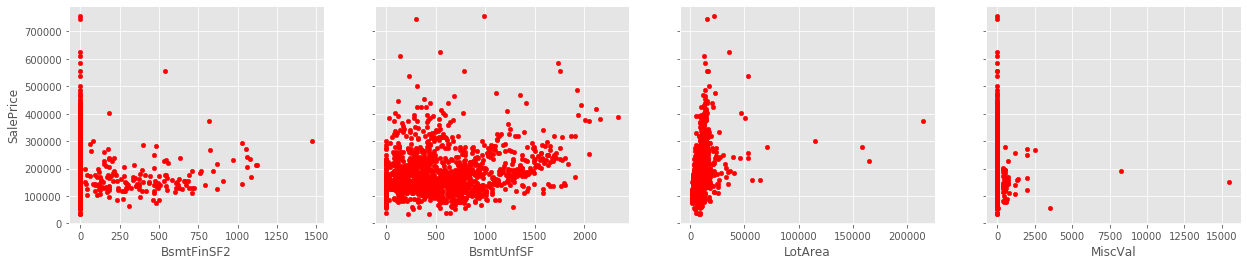

In [115]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(21, 4))
axes = np.ravel(axes)
for i, c in zip(range(5), col_name2):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

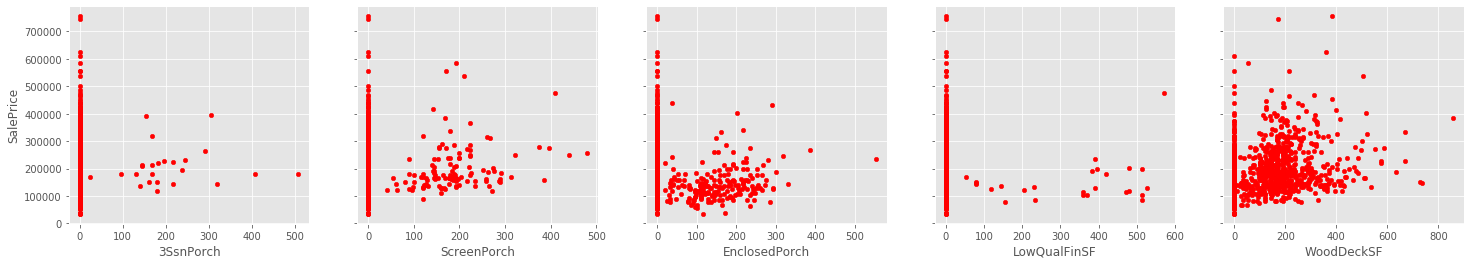

In [116]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(25, 4))
axes = np.ravel(axes)
for i, c in zip(range(5), col_name3):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

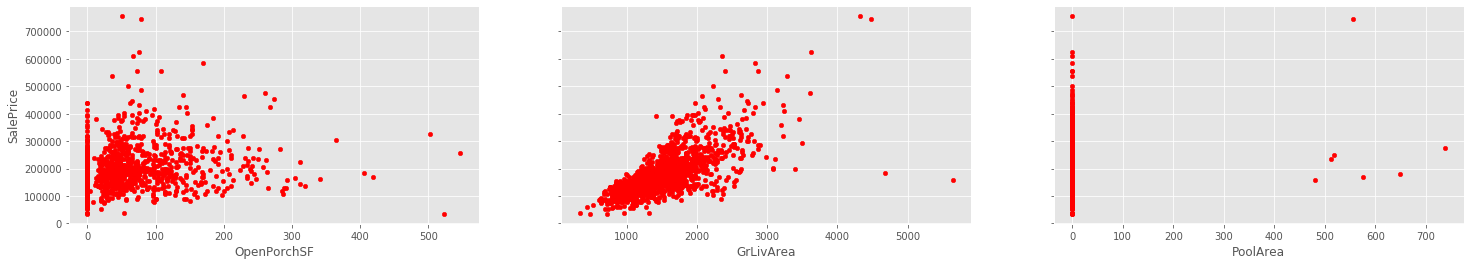

In [117]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 4))
axes = np.ravel(axes)
col_name4= ['OpenPorchSF','GrLivArea','PoolArea']
for i, c in zip(range(5), col_name4):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

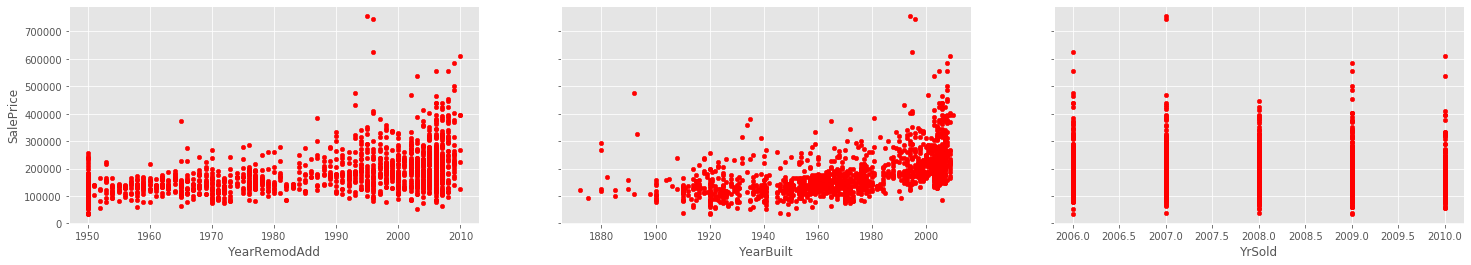

In [118]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 4))
axes = np.ravel(axes)
col_name4= ['YearRemodAdd','YearBuilt','YrSold']
for i, c in zip(range(5), col_name4):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

In [119]:
# df_train[df_train['SalePrice']>700000]

<!-- The above houses are outliers for most features<br>
Deleting.. -->

In [120]:
# df.drop(df[df['SalePrice']>700000].index, axis=0, inplace=True)

In [121]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,706.000000,0.000000,150.000000,856.000000,GasA,9,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,7.000000,8,Typ,0,2,548.000000,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.000000
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,5,5,CBlock,978.000000,0.000000,284.000000,1262.000000,GasA,9,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,5.000000,6,Typ,1,2,460.000000,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.000000
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,486.000000,0.000000,434.000000,920.000000,GasA,9,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,7.000000,6,Typ,1,2,608.000000,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.000000
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,5,5,BrkTil,216.000000,0.000000,540.000000,756.000000,GasA,7,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,7.000000,7,Typ,1,3,642.000000,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,7,5,PConc,655.000000,0.000000,490.000000,1145.000000,GasA,9,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,7.000000,9,Typ,1,3,836.000000,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.000000


In [122]:
df[df['SalePrice']>700000]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,9,5,PConc,1455.000000,0.000000,989.000000,2444.000000,GasA,9,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,9.000000,10,Typ,2,3,832.000000,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000.000000
1182,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,7,5,PConc,2096.000000,0.000000,300.000000,2396.000000,GasA,9,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,9.000000,10,Typ,2,3,813.000000,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000.000000


Removing some features

In [123]:
df_train.drop(['BsmtFinSF2','3SsnPorch', 'ScreenPorch','LowQualFinSF','PoolArea'], axis = 1, inplace=True) 
df_test.drop(['BsmtFinSF2','3SsnPorch', 'ScreenPorch','LowQualFinSF','PoolArea'], axis = 1, inplace=True) 


In [124]:
print(df_train.shape)
print(df_test.shape)

(1460, 202)
(1459, 202)


In [125]:
df1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=207)

In [126]:
# delete outliers
print(df_train.shape)
df_train = df_train[df_train['GrLivArea'] < 4500]
df_train = df_train[df_train['LotArea'] < 100000]
df_train = df_train[df_train['TotalBsmtSF'] < 3000]
df_train = df_train[df_train['1stFlrSF'] < 2500]
df_train = df_train[df_train['BsmtFinSF1'] < 2000]
df_train = df_train[df_train['MiscVal'] < 2500]
df_train = df_train[df_train['WoodDeckSF'] < 700]
df_train = df_train[df_train['OpenPorchSF'] < 400]
df_train = df_train[df_train['GrLivArea'] < 4000]

(1460, 202)


(1433, 202)
(1459, 202)


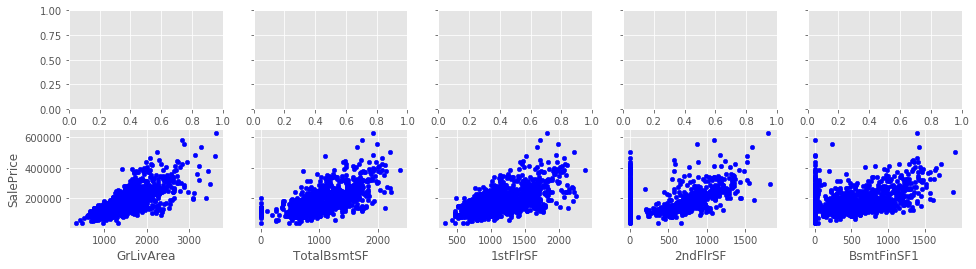

In [127]:
print(df_train.shape)
print(df_test.shape)
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
for i, c in zip(range(5,10), col_name1):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

<h3>Removing Collinear variables</h3>

As the Algorithm(linear regression) assumes input features to be mutually independent(no co-linearity).

In [128]:
df_train.iloc[:,:1]

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1453,17217
1454,7500
1455,7917
1456,13175


In [129]:
print(df_train.shape)
print(df_test.shape)

(1433, 202)
(1459, 202)


In [130]:
df_train.columns== df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [131]:
# Absolute value correlation matrix
corr_matrix = df_train.iloc[:,:56].corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] #0.8 is the threshold


In [132]:
to_drop

['TotRmsAbvGrd', 'GarageArea', 'SalePrice', 'MSZoning_RM']

In [ ]:
# # Absolute value correlation matrix
# corr_matrix = df_train_final.iloc[:,:56].corr().abs()
# # Upper triangle of correlations
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Select columns with correlations above threshold
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] #0.8 is the threshold
# df_train0 = df_train.drop(columns = to_drop)
# df_test0 = df_test.drop(columns = to_drop)

In [ ]:
print(df.shape)

separating the merged data frame ino original forms

In [ ]:
# df_final[df_final['SalePrice'].isnull()].index

In [135]:
# df_final = df_final.reset_index(drop = True) 

In [71]:
# train=df[0:1460]
# test=df[1460:2919]

In [72]:
# # test.drop(['SalePrice'], axis= 1, inplace = True)
# SP_final= train_final['SalePrice']
# train_final.drop(['SalePrice'],axis =1 , inplace =True)
# test_final.drop(['SalePrice'],axis =1 , inplace =True)

In [136]:
df_SP= df_train['SalePrice']
df_train.drop(['SalePrice'],axis =1 , inplace =True)
df_test.drop(['SalePrice'],axis =1 , inplace =True)

In [137]:
# #Using the seaborn library
# import seaborn as sb
# train.interpolate(method='linear',inplace=True)
# test.interpolate(method='linear',inplace=True)
# train_corr=train.corr()
# plt.figure(figsize=(5,20))
# sb.heatmap(train_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(60),vmin=-1, cmap='PiYG', annot=True)
# plt.show()

In [138]:

# import xgboost as xgb
# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
# from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor
# from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.pipeline import make_pipeline


# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import warnings
# warnings.filterwarnings("ignore")

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

Splitting into test and train for model testing

In [139]:
# Splitting into test train group
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_log_error

X = train_final.loc[:, :].to_numpy().astype('float')
y = SP_final.loc[:].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

NameError: name 'train_final' is not defined

In [140]:
y

NameError: name 'y' is not defined

In [141]:
X

NameError: name 'X' is not defined

In [ ]:
# y_train = train_final['SalePrice']
# X_train = train_final.drop(['SalePrice'], axis=1, inplace= True) 

In [142]:
X_test = df_test_final.loc[:,:].to_numpy().astype('float')
X_train = df_train_final.loc[:,:].to_numpy().astype('float')

y_train = df_SP_final.loc[:].ravel()

NameError: name 'df_test_final' is not defined

In [143]:
m = X_train.mean()
std = X_train.std()
X_train = (X_train - m) / std
X_test = (X_test - m) / std

NameError: name 'X_train' is not defined

Linear Regression Model

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
# Create linear regression object
LR = LinearRegression()

# Train the model using the training sets
LR.fit(df_train, df_SP)
# 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
# # Create linear regression object
# Ls = LassoCV()

# # Train the model using the training sets
# Ls.fit(X_train, y_train)

In [147]:
# maxcoef = np.argsort(-np.abs(Ls.coef_))
# coef = Ls.coef_[maxcoef]
# for i in range(0, 5):
#     print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

In [148]:
print(df_train.shape)

(1433, 201)


In [149]:
print(df_test.shape)
print(testID.shape)

(1459, 201)
(1459,)


In [150]:
#Linear Regression
# test_X = test_final.loc[:, :].to_numpy().astype('float')
submit1 = pd.DataFrame({'Id': testID, 'SalePrice': LR.predict(df_test)})
submit1.to_csv('submission1.csv', index=False)



In [151]:
testID.shape

(1459,)

In [ ]:
# Linear Regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))


In [ ]:
# Create linear regression object
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here

# Train the model using the training sets
train_EN = EN.fit(X_train, y_train)


In [ ]:

# test_X = test_final.loc[:, :].to_numpy().astype('float')
submit2 = pd.DataFrame({'Id': testID, 'SalePrice': (EN.predict(X_test))})
submit2.to_csv('submission2.csv', index=False)


In [ ]:
from sklearn.linear_model import Ridge
clf =  Ridge(alpha = 0.0001, max_iter = 500000, normalize =  False)
clf.fit(X_train, y_train)

In [ ]:
submit3 = pd.DataFrame({'Id': testID, 'SalePrice': (clf.predict(X_test))})
submit3.to_csv('submission3.csv', index=False)


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor  
# def calculate_vif_(X):
#     variables = list(X.columns)
#     vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
#     return vif

# calculate_vif_(train)

In [ ]:
set(train_final.columns)

In [ ]:
df_final['PoolArea'].isnull().sum()


In [ ]:
df_final['OverallQual'].dtype

In [ ]:
Rr=RidgeCV()
Rr.fit(X_train,y_train)
Ypred3=Rr.predict(X_test)


In [ ]:
submit4 = pd.DataFrame({'Id': testID, 'SalePrice': np.expm1(Rr.predict(X_test))})
submit4.to_csv('submission1.csv', index=False)
